In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate,UpSampling2D
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D,Flatten, Reshape,Activation
from tensorflow.keras.models import Model,Sequential
from sklearn import metrics
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D,Flatten, Reshape,Activation,Dropout



In [2]:
from Image_Classification.scripts.preprocess import load_data, normalize, one_hot, flatten_image
from Image_Classification.scripts.log_softmax import LogisticRegression, get_accuracy
from Image_Classification.scripts.PCA import PCA
from Image_Classification.scripts.utility import plot_predictions

import numpy as np
import keras
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
DATADIR ="dataset"
CATEGORIES = ["BG_OICR","BNL_AssegniGDO","BPA_Effetti","PIT_Effetti"]
training_data=[]
def create_training_data():
    IMG_SIZE=64
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)):  
            try:
                
                img_array = cv2.imread(os.path.join(path,img) ,1)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array_rgb=cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB)
                training_data.append([new_array_rgb, class_num]) 
            except Exception as e:  
                pass
            
create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.36it/s]


(64, 64, 3)
3


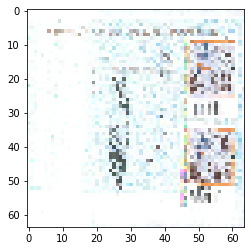

(64, 64, 3)
2


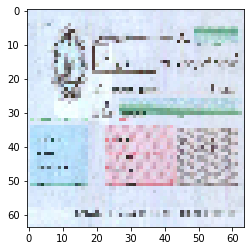

(64, 64, 3)
2


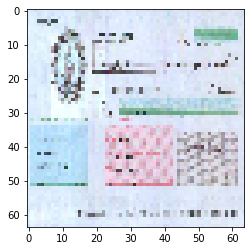

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [246]]

  [[251]
   [254]
   [238]
   ...
   [255]
   [236]
   [247]]

  [[253]
   [254]
   [254]
   ...
   [239]
   [244]
   [248]]

  ...

  [[240]
   [241]
   [244]
   ...
   [209]
   [228]
   [242]]

  [[242]
   [250]
   [255]
   ...
   [252]
   [254]
   [253]]

  [[247]
   [253]
   [251]
   ...
   [253]
   [254]
   [255]]]


 [[[253]
   [255]
   [244]
   ...
   [252]
   [233]
   [249]]

  [[249]
   [223]
   [244]
   ...
   [245]
   [250]
   [254]]

  [[186]
   [233]
   [236]
   ...
   [255]
   [254]
   [241]]

  ...

  [[255]
   [246]
   [255]
   ...
   [241]
   [241]
   [251]]

  [[248]
   [253]
   [251]
   ...
   [250]
   [254]
   [213]]

  [[237]
   [245]
   [254]
   ...
   [252]
   [247]
   [253]]]


 [[[255]
   [247]
   [255]
   ...
   [230]
   [234]
   [243]]

  [[246]
   [255]
   [252]
   ...
   [252]
   [255]
   [238]]

  [[253]
   [254]
   [250]
   ...
   [242]
   [250]
   [255]]

  ...

  [[255]
   [255]
   [255]
   

In [5]:
import random

random.shuffle(training_data)
for image , label in training_data[:3]:
    print(image.shape)
    print(label)
    
    plt.imshow(image)
    plt.show()
    
X = []
y = []
IMG_SIZE=64
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))#this was use for the gray image so i did use that

X = np.array(X).reshape(-3, IMG_SIZE, IMG_SIZE, 3)#i put it -3 and 3 it is because of colour image


In [6]:
import pickle

pickle_out = open("X_ML.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_ML.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

import pickle
pickle_in = open("X_ML.pickle","rb")
X = pickle.load(pickle_in)
pickle_in=open("Y_ML.pickle",'rb')
Y=pickle.load(pickle_in)

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

print(X[0].shape)
X=np.array(X).reshape(-3,64,64,3)
print(X[0].shape)

(64, 64, 3)
(64, 64, 3)


# Sequential Autoencoder Convolutional Neural Network (CNN)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D,UpSampling2D,Flatten, Reshape,BatchNormalization
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=42)


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [9]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

In [10]:
x_train.shape, x_test.shape

((60, 64, 64, 3), (15, 64, 64, 3))

In [11]:
from tensorflow.keras.models import Model,Sequential
autoencoder= Sequential()


autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
#autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2, 2), padding='same'))


#autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'),)
#autoencoder.add(BatchNormalization())
#autoencoder.add(MaxPooling2D((2, 2), padding='same'))

#autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
#autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(16, (3, 3),  activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2, 2), padding='same'))


autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())

autoencoder.add(Flatten())
autoencoder.add(Reshape((16, 16, 8)))#if chang no of convolutions chang this

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))


autoencoder.add(Conv2D(16, (3, 3),  activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))


autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
#autoencoder.add(UpSampling2D((2, 2)))


#autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())
#autoencoder.add(UpSampling2D((2, 2)))

#autoencoder.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#autoencoder.add(BatchNormalization())

#autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
#autoencoder.add(BatchNormalization())
encoder=Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('flatten').output)


In [12]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 8)         0

In [13]:

#loss='sparse_categorical_crossentropy
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder_train=autoencoder.fit(x_train, x_train,
                epochs=45,
                batch_size=128,
                validation_data=(x_test, x_test))

Train on 60 samples, validate on 15 samples
Epoch 1/45
60/60 [==============================] - 4s 70ms/sample - loss: 2.6783 - accuracy: 0.5458 - val_loss: 2.9260 - val_accuracy: 0.3210
Epoch 2/45
60/60 [==============================] - 2s 38ms/sample - loss: 2.6781 - accuracy: 0.2723 - val_loss: 2.9259 - val_accuracy: 0.3579
Epoch 3/45
60/60 [==============================] - 2s 38ms/sample - loss: 2.6780 - accuracy: 0.3027 - val_loss: 2.9258 - val_accuracy: 0.3648
Epoch 4/45
60/60 [==============================] - 2s 39ms/sample - loss: 2.6779 - accuracy: 0.3077 - val_loss: 2.9257 - val_accuracy: 0.3675
Epoch 5/45
60/60 [==============================] - 2s 39ms/sample - loss: 2.6779 - accuracy: 0.3095 - val_loss: 2.9257 - val_accuracy: 0.3686
Epoch 6/45
60/60 [==============================] - 2s 40ms/sample - loss: 2.6779 - accuracy: 0.3105 - val_loss: 2.9258 - val_accuracy: 0.3712
Epoch 7/45
60/60 [==============================] - 2s 38ms/sample - loss: 2.6779 - accuracy: 0.31

In [14]:
pr=autoencoder.predict(x_test)
pr=np.array(pr)
print(pr)

[[[[0.49356237 0.4988835  0.5060905 ]
   [0.49016607 0.4993156  0.50993305]
   [0.4907526  0.49985483 0.50941074]
   ...
   [0.48843727 0.50131524 0.51260453]
   [0.48932135 0.5007777  0.51315755]
   [0.4908183  0.50014913 0.51129484]]

  [[0.49083078 0.4999336  0.50751257]
   [0.4862224  0.5002944  0.5112638 ]
   [0.4871844  0.5004096  0.5116665 ]
   ...
   [0.4848825  0.5028051  0.51633954]
   [0.48430818 0.50135034 0.5143245 ]
   [0.48909757 0.5000688  0.5116074 ]]

  [[0.48917666 0.5012054  0.5070174 ]
   [0.48486653 0.50049603 0.5115176 ]
   [0.4864708  0.5000759  0.5123852 ]
   ...
   [0.48376557 0.50182766 0.51514864]
   [0.48351082 0.5020144  0.5133846 ]
   [0.48943016 0.4998881  0.51079893]]

  ...

  [[0.49104705 0.50149345 0.5051249 ]
   [0.48813036 0.50019914 0.5100251 ]
   [0.48868838 0.5001992  0.50991184]
   ...
   [0.4863357  0.5015534  0.5135179 ]
   [0.4862252  0.50195    0.5118918 ]
   [0.48925513 0.5000963  0.51028514]]

  [[0.4908534  0.50044984 0.50574464]
   [0.4

In [15]:
# evaluate the model
_, train_acc = autoencoder.evaluate(x_train, x_train)
_, test_acc = autoencoder.evaluate(x_test, x_test)

15/15 [==============================] - 0s 8ms/sample - loss: 2.9256 - accuracy: 0.3714


In [16]:
#####Print the encoded images
import numpy as np
import matplotlib.pyplot as plt
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

In [18]:
plt.figure(figsize=(18, 4))

<Figure size 1296x288 with 0 Axes>

<Figure size 1296x288 with 0 Axes>

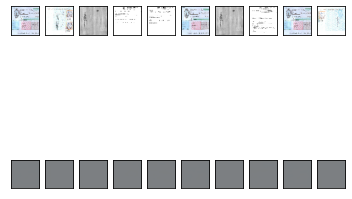

In [19]:
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
   # ax = plt.subplot(3, num_images, num_images + i + 1)
    #plt.imshow(encoded_imgs[image_idx].reshape(64,3))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
# Extract the encoder
encoder= K.function([encoder.layers[0].input], [encoder.layers[4].output])
x_test=np.array(x_test)
print(x_test.shape)
print(encoder([x_test])[0].shape)

(15, 64, 64, 3)
(15, 16, 16, 16)


In [21]:
encoded_images = encoder([x_test])[0].reshape(-1,16*16*16)
kmeans = KMeans(n_clusters=2)
clustered_training_set = kmeans.fit_predict(encoded_images)
y_test=np.array(y_test)

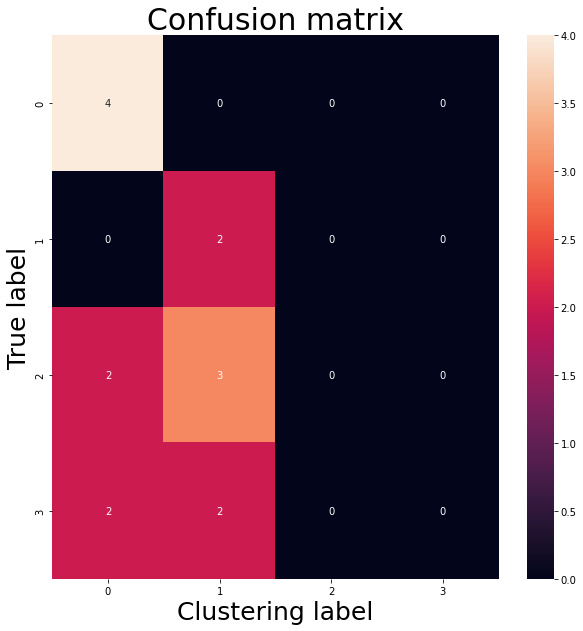

In [22]:
from sklearn.metrics import confusion_matrix
cm_cc = confusion_matrix(y_test, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_cc, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [23]:
# Plot the actual pictures grouped by clustering


fig = plt.figure(figsize=(30,20))

<Figure size 2160x1440 with 0 Axes>

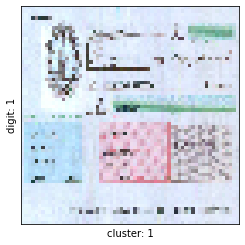

In [24]:
for r in range(2):
    cluster = cm_cc[r].argmax()
    for c, val in enumerate(x_test[clustered_training_set == cluster][0:4]):
        fig.add_subplot(10, 10, 10*r+c+1)
        plt.imshow(val.reshape((64,64,3)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(r))
clustered_training_set=np.array(clustered_training_set)

# Logistic Regression Multi-Class Classification

In [25]:
#Logistic Regression 
from Image_Classification.scripts.preprocess import load_data, normalize, one_hot, flatten_image
from Image_Classification.scripts.log_softmax import LogisticRegression, get_accuracy
from Image_Classification.scripts.PCA import PCA
from Image_Classification.scripts.utility import plot_predictions

import numpy as np
import keras
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
%matplotlib inline

In [26]:
# normalize the data set
x_train = normalize(x_train)
x_test = normalize(x_test)

x_train = flatten_image(x_train)
x_test = flatten_image(x_test)

In [27]:
lg = LogisticRegression(x_train, y_train)

In [28]:
y_pred = lg.predict(x_test)

In [63]:
acc = get_accuracy(y_pred, y_test)
print(acc*373.)

99.46666666666667


In [30]:
# normalize the data set
x_train = normalize(x_train)
x_test = normalize(x_test)

x_train = flatten_image(x_train)
x_test = flatten_image(x_test)

In [31]:
lg = LogisticRegression(x_train, y_train)

In [60]:
y_pred = lg.predict(x_test)
acc = get_accuracy(y_pred, y_test)
print(acc*310)

82.66666666666667


# NaiveBayes

In [33]:
from datetime import datetime

# clock starting time
st_time = datetime.now()
from Image_Classification.scripts.Bernoulli_NB import NaiveBayes
# create new naiveBayes class object with dataset and label
# Training of data set here
NB = NaiveBayes(x_train, y_train)
# generate image and class frequency
NB.GenImageFreq()
# calculate posterior mean of the dataset
NB.GenPosteriorMean()
print("Time taken to train classifier :", (datetime.now() - st_time))

Time taken to train classifier : 0:00:06.916565


In [34]:
# normalize the data set
x_train = normalize(x_train)
x_test = normalize(x_test)

In [35]:
x_train = flatten_image(x_train)
x_test = flatten_image(x_test)

print(x_train.shape)
print(x_test.shape)

(60, 12288)
(15, 12288)


In [58]:
y_pred = lg.predict(x_test)
acc = get_accuracy(y_pred, y_test)
print(acc*370)

98.66666666666667


# NER and OCR and Other Extration include

In [37]:
!pip install easyocr

In [38]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [39]:
reader = easyocr.Reader(['it'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [40]:
import cv2
import glob
path=glob.glob('Custom-Named-Entity-Recognition-main\Dataset\* .jpg')
for file in path:
    img=cv2.imread(file)
    cv2.imshow('Dataset',img)
    cv2.waitkey(1)
    cv2.destroyAllWindows()

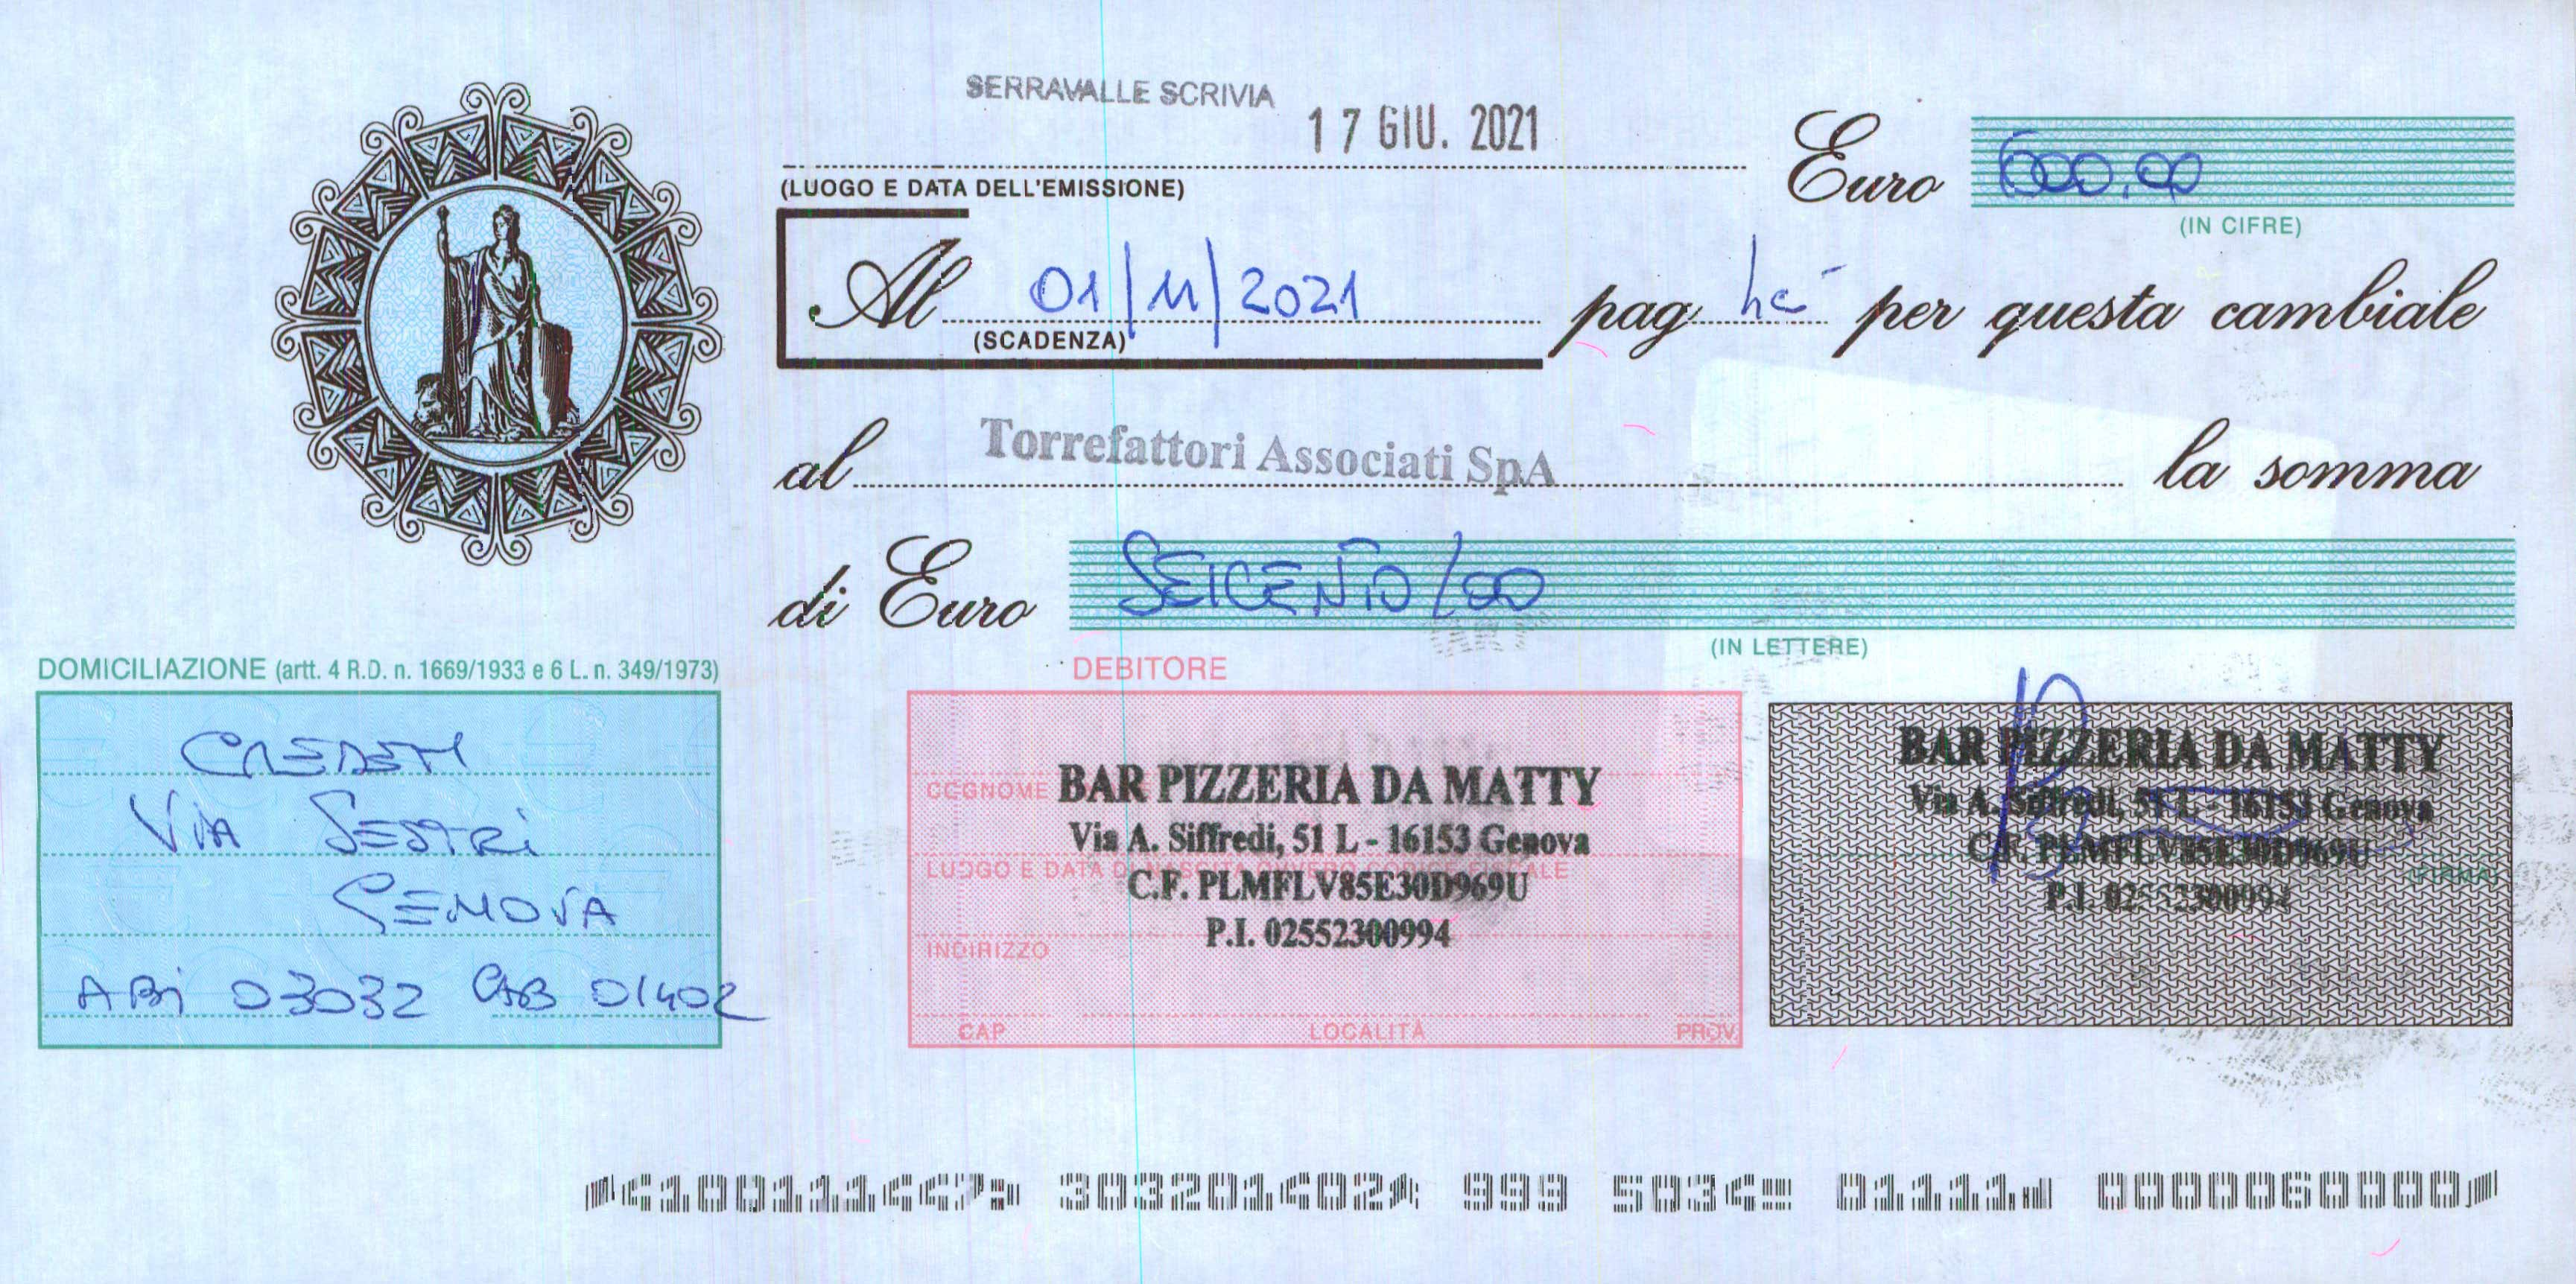

In [41]:
path=glob.glob('Custom-Named-Entity-Recognition-main\Dataset\* .jpg')
for file in path:
    img=cv2.imread(file)
Image("00000021.jpg")

In [42]:
output = reader.readtext("00000022.jpg")
output

C:\Users\abrar\.conda\envs\tensorflow\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[369, 134], [2173, 134], [2173, 208], [369, 208]],
  "SPAZIO RISERVATO PER L'EVENTUALE APPLICAZIONE DI MARCHE",
  0.6247557373309656),
 ([[2195, 160], [2228, 160], [2228, 196], [2195, 196]],
  '0',
  0.9997315586975333),
 ([[2237, 136], [3080, 136], [3080, 204], [2237, 204]],
  'CONTRASSEGNO TELEMATICO',
  0.9390652715790615),
 ([[810, 595], [935, 595], [935, 664], [810, 664]],
  'NARCA',
  0.6893772192085582),
 ([[580, 736], [598, 736], [598, 760], [580, 760]], '2', 0.4502973994359003),
 ([[592, 700], [798, 700], [798, 766], [592, 766]],
  'dene Pinanze',
  0.24886711349200955),
 ([[1274, 700], [1480, 700], [1480, 778], [1274, 778]],
  '50ze9',
  0.2535394957563425),
 ([[1619, 699], [2100, 699], [2100, 811], [1619, 811]],
  '25/262222336',
  0.2107295704056302),
 ([[1827, 708], [1983, 708], [1983, 769], [1827, 769]],
  '{202',
  0.2778317928314209),
 ([[1323, 739], [1562, 739], [1562, 808], [1323, 808]],
  'Valuta',
  0.4451124209648273),
 ([[1623, 761], [1708, 761], [1708, 805], [

In [43]:
cord = output[0][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

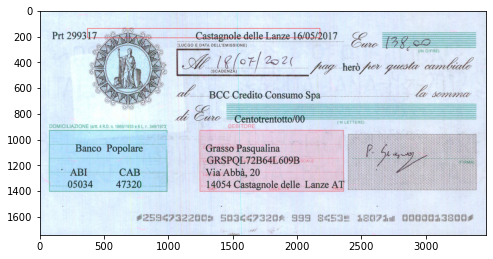

In [44]:
image = cv2.imread('ab.jpg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [45]:
#outputs=readtext(ab.jpg)
text=" "
for outputs in output:
    text+= outputs[1] + ' '
print (text)    

 SPAZIO RISERVATO PER L'EVENTUALE APPLICAZIONE DI MARCHE 0 CONTRASSEGNO TELEMATICO NARCA 2 dene Pinanze 50ze9 25/262222336 {202 Valuta EF 0004 AbENVA 708 20 CANBIAn €1,20 dell Economia SETTE/ZA Ministero A4 100szoql ntrate 119 967422ialg DubO1  01040642 110672924 21200057 837082 8100045 FICANO 005743 


In [46]:
import json

jstr = json.dumps(text, indent=4)
print(jstr)


" SPAZIO RISERVATO PER L'EVENTUALE APPLICAZIONE DI MARCHE 0 CONTRASSEGNO TELEMATICO NARCA 2 dene Pinanze 50ze9 25/262222336 {202 Valuta EF 0004 AbENVA 708 20 CANBIAn \u20ac1,20 dell Economia SETTE/ZA Ministero A4 100szoql ntrate 119 967422ialg DubO1  01040642 110672924 21200057 837082 8100045 FICANO 005743 "


In [47]:
# the JSON file is named as test1
out_file = open("json_file_as_output.json", "w")
json.dump(text, out_file, indent = 4, sort_keys = False)
out_file.close()

In [48]:
text ="dataset"
entities = ["BG_OICR","BNL_AssegniGDO","BPA_Effetti","PIT_Effetti"]
training_data=[]

In [49]:
import os
import csv
import json
import re
import pandas as pd
from pathlib import Path
import spacy

In [50]:
test_text_files = text
len(test_text_files)

7

In [51]:
test_data = pd.DataFrame(columns=["filename", "text"])

test_data["Extraction"] = test_text_files

data_text = []
for file in test_data["Extraction"]:
    rec_text = []
    pattern = r"\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,(.+)"
    try:
        with open(f"/qubitrics/test_text/{file}") as f:
            lines = f.readlines()
            for line in lines:
                rec_text += re.findall(pattern, line)
    except:
        pass
    data_text.append(" ".join([x.strip() for x in rec_text]))
test_data["Extract Text"] = data_text

In [52]:
test_data

,filename,text,Extraction,Extract Text


In [53]:
for index, row in test_data.iterrows():
    op_dict = {"company": "", "date": "", "address": "", "total": ""}
    doc = nlp(row["text"])
    for ent in doc.ents:      #identifying the entities using the trained model
        op_dict[ent.label_] = ent.text
  
    for tag, tag_memory in memory_dictionary.items():
        for tag_value in tag_memory:
            if tag=="total":
                pass   
            #looking through known entities to identify the entities missed by the model
            elif (re.search(tag_value, row["text"]) != None) and (op_dict[tag] == ""):    
                op_dict[tag]=tag_value
            
    print("Entities", op_dict)
    #saving the identified entities in the format specified in the submission rules
    json_object = json.dumps(op_dict, indent = 4) 
    with open(f"/content/drive/MyDrive/qubitrics_internship_assignment/output/{row['filename']}", "w") as op:
        op.write(json_object)

In [54]:
import json

jstr = json.dumps(text, indent=4)
print(jstr)


"dataset"


# Extract all the Information on that particular selected picture

In [55]:
#outputs=readtext(ab.jpg)
text=" "
for outputs in output:
    text+= outputs[1] + ' '
print (text)    

 SPAZIO RISERVATO PER L'EVENTUALE APPLICAZIONE DI MARCHE 0 CONTRASSEGNO TELEMATICO NARCA 2 dene Pinanze 50ze9 25/262222336 {202 Valuta EF 0004 AbENVA 708 20 CANBIAn €1,20 dell Economia SETTE/ZA Ministero A4 100szoql ntrate 119 967422ialg DubO1  01040642 110672924 21200057 837082 8100045 FICANO 005743 


In [ ]:
output of json file created